##  1)  MATPLOTLIB CONFIGURATION

- With Python 3.7 installed from the Windows 64-bit executable, the default matplotlibrc file is located in the following directory ([see point number 4](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)).


In [1]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\Seve\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

- Remote matplotlibrc.

In [1]:
def loadremote_mplrc(url = ''):
    import urllib3
    from matplotlib import rcParams
    http = urllib3.PoolManager()
    response = http.request('GET', url)

    P={}
    for line in response.data.splitlines():
        l=line.decode('utf-8')
        if not l.startswith("#") and not l.startswith(" ") and l:
            a=l.split(":")
            if len(a) == 2:
                try:
                    ## remove inline comments
                    b = a[1].split("#")
                    P[a[0].strip()]=b[0].strip()
                except:
                    P[a[0].strip()]=a[1].strip()

    #print(P)                
    rcParams.update(P)

In [2]:
matplotlibrc_url = 'https://tessarinseve.pythonanywhere.com/staticweb/matplotlibrc'

loadremote_mplrc(url = matplotlibrc_url)

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math as m

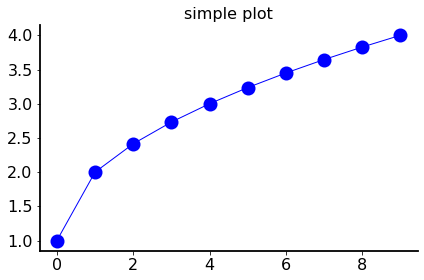

In [4]:

fig=plt.figure()
x=np.arange(10)
y=(lambda x:1+np.sqrt(x))(x)
ax=plt.gca()
ax.set_title("simple plot")
plt.plot(x,y,'bo-')


## 2)  Matplotlib figure to Data-URI

- Copy/paste a matplotlib figure to a markdown file encoded to a Data-URI scheme. 
- A standard use case: include a figure in a [HTML presentation](https://www.buymeacoffee.com/seve/remarkpy-windows-markdown-presentation-tool).


In [10]:

def figure_to_png_datauri(fig,mime = "png"):
    from io import BytesIO
    import urllib, base64
    """Return a base64-encoded PNG from a matplotlib figure."""
    imgdata = BytesIO()#### File-like objct
    fig.savefig(imgdata, format=mime)
    imgdata.seek(0)
    data64 = base64.b64encode(imgdata.getvalue())
    return '![Figure](data:{0};base64,{1})'.format(mime, data64.decode("utf-8"))



In [11]:
"{}".format(figure_to_png_datauri(fig))

'![Figure](data:png;base64,iVBORw0KGgoAAAANSUhEUgAAAYwAAAELCAYAAADKjLEqAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAexklEQVR4nO3deZhU5Zn38e/doARQgoqaVmMYRsCIuyTiEhphcAccLs2gSRRBHI3mHSWKJiKSRhN3B6JRwTZgVEhEGgFHRVsFN1QUUNqAKIoxjaiAsgVE+nn/eKq0abq6Tq3nVNXvc111tX2WOjcl9N3Pdj/mnENERCSZsrADEBGRwqCEISIigShhiIhIIEoYIiISiBKGiIgEooQhIiKBKGFIwTCzXmbmzKxXCM/+0Mwm5vmZHWN/3sFp3DvazHrnICwpYUoYUkjeBI6JfZXmXQcoYUhWtQw7AJGgnHPrgHlhxyFSqtTCkMgwsy5mVm1mn5rZZjP7yMweMbOWsfM7dEmZ2fNm9qKZnWxmC83sX2a2wMyONrOWZvZ7M1tpZmvMbKKZtW1wb7zL55dmdnvsuZvMbJaZdQwQ77+Z2UNm9pmZbYk9/z8D3Dc49tyeZjbdzDaY2Wozu8vMWge4/+dmtij2GX1uZn8xs/IG5+PlG66JPceZ2ehk7yuSjBKGRMnjwL7AxcBJwNXAFpL/PT0AuAW4ETgLaAXMAO4GyoHBQCXwM3xXTWO/AToD5wOXAEcBs81sp0QPNLPvA68ChwGXA/3xXWWPmln/pH9S70HgPWAgcAcwLBZzQmZ2IfAX4O+x+67Gf1ZzzGyX2GXHxL5OjP33McB9AWMSScw5p5deob+ADoAD+jdzTa/YNb0aHHse2Ap0anCsf+y6ZxrdPw34oMH3HWPXvQOUNTh+XOz40AbHPgQmNvi+CvgM2KPRM54GFib5sw6Ovf89jY5fA2wDujSKb3Ds+xbAKuC5R

## 3) Python Snippets Notebook

It's possible also to import a entire notebook as a Python module and then access the internal functions as methods. Works also on Windows with the _readline_ module removed.

In [5]:
import sys
import rlcompleter
## import readline not working on Windows
## readline.parse_and_bind("tab: complete")
from pathlib import Path


sys.path.append("C:\\users\\admin\\mywinpythonlib")

In [6]:
import nbimported
sys.meta_path.append(nbimported.NotebookFinder())

In [7]:
import  PythonSnippets

importing Jupyter notebook from PythonSnippets.ipynb


In [9]:
PythonSnippets.loadremote_mplrc(matplotlibrc_url)

## 4) Startup script .bashrc (mingw64w)
 The environmental variable __PYTHONSTARTUP__ defines the user's startup s
 ript.    

```
export PYTHONSTARTUP="${HOME}/.winpythonstartup.py"
```

In this case the.winpythonstartup.py script will be executed each time python enters the interactive mode e.g. Python REPL and Jupyter notebook with a Python kernel. 




## 5) Pandas GUI

Save to storeddfs.py 

```python
# %load storeddfs.py
from pandasgui import show
storeddfs = [globals()[var] for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]
show(*storeddfs)

```

Open Jupyter Console and type %load storeddfs.py